# Introduction
In this script I made some EDA graphs and used three classification algorithms to predict income. To improve accuracy I tuned the algorithm's parameters. 
Here I compare the DecisionTreeClassifier, LogisticRegression and KNeighborsClassifier. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# 1. Exploratory Data Analysis

In [2]:
pd.set_option('float_format', '{:.3f}'.format)

In [3]:
df = pd.read_csv('../input/income-classification/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# removing redundant spaces from column names
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [5]:
 print('Check the data. Some values are missing.') if df.isnull().any().any() else print("There are no missing values in the data.")

There are no missing values in the data.


In [6]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

There are question marks in the columns instead of 'NaN' or 'None' values. Question marks signalize missing values, that is why they will be removed.

In [7]:
shape0 = df.shape[0]
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
df = df.dropna().reset_index().drop(columns=['index'])
shape1 = df.shape[0]
print(str(shape0 - shape1) + ' rows have been removed.')

2399 rows have been removed.


In [8]:
df['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

## 1.1 Adjusting income column to binary type

In [9]:
income = df.income.value_counts()
income

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

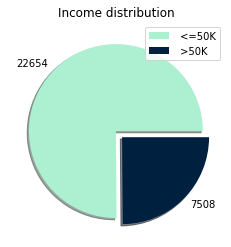

In [10]:
colors = ['#ADEFD1FF', '#00203FFF']
explode = [0, 0.1]
plt.pie(income, labels=income.values, colors=colors, explode = explode, shadow=True)
plt.title('Income distribution')
plt.legend(labels=income.index)

In [11]:
# changing string to binary values.
df['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

## 1.2 Creating correlation heatmap

In [12]:
# checking types of variables
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [13]:
# object type variables cannot be included in a correlation heatmap.
stats = df.select_dtypes(['float', 'int64']).drop(columns=['income'])

<AxesSubplot:>

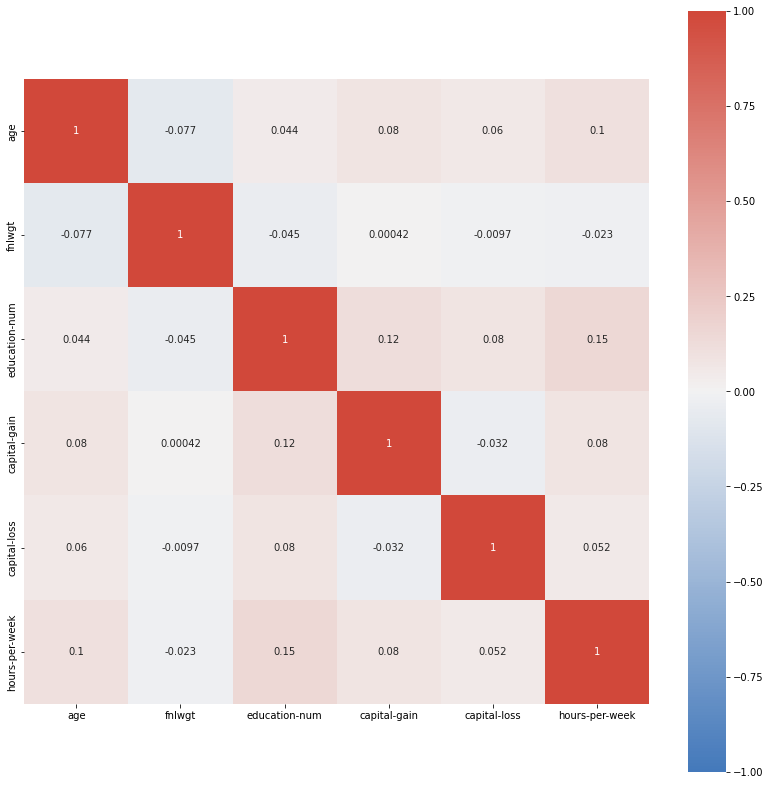

In [14]:
fig = plt.figure(figsize=(14,14))
corr = stats.corr()
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(h_neg=250, h_pos=15, as_cmap=True),
            square=True, annot=True)

There is barely correlation between all numeric variables.

## 1.2 Creating density functions and boxplots

In [15]:
stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30162.000,38.438,13.135,17.000,28.000,37.000,47.000,90.000
fnlwgt,30162.000,189793.834,105652.972,13769.000,117627.250,178425.000,237628.500,1484705.000
education-num,30162.000,10.121,2.550,1.000,9.000,10.000,13.000,16.000
capital-gain,30162.000,1092.008,7406.346,0.000,0.000,0.000,0.000,99999.000
capital-loss,30162.000,88.372,404.298,0.000,0.000,0.000,0.000,4356.000
hours-per-week,30162.000,40.931,11.980,1.000,40.000,40.000,45.000,99.000


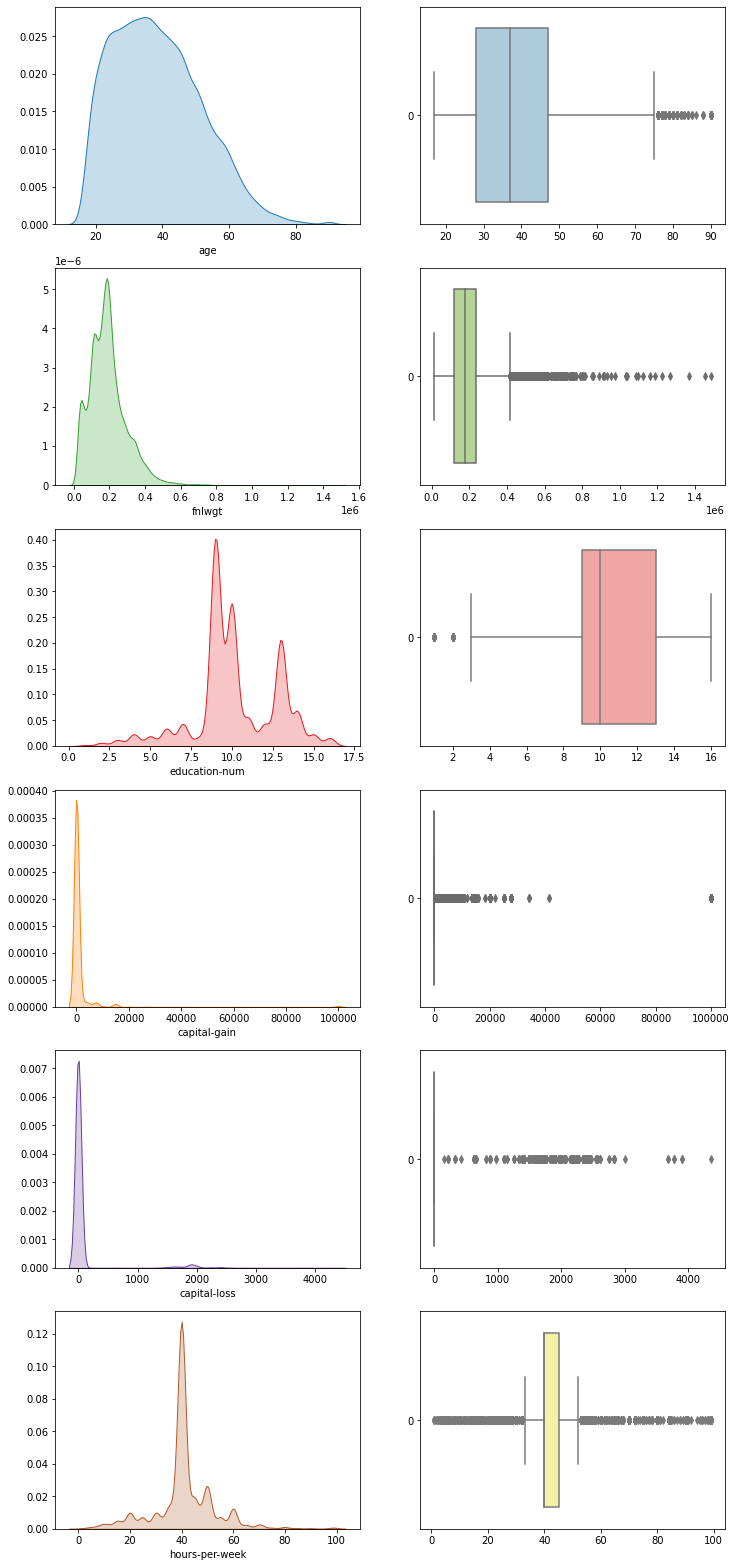

In [16]:
# creating graphs
colors = list(sns.color_palette("Paired"))
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12,28))
for i in range(6):
    sns.kdeplot(stats.iloc[:, i], 
                shade = True, 
                color = colors[i*2+1], 
                ax=ax[i, 0]).set(ylabel = '', xlabel = stats.columns[i])
    
    sns.boxplot(data=stats.iloc[:, i],
                color = colors[i*2], orient="h",
                ax=ax[i, 1]).set(xlabel = '', ylabel = '')
plt.show()

# 2. Standardization and preparing variables

In [17]:
df_final = pd.get_dummies(df)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = df_final.drop(columns=['income'])
y = df_final['income']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
# creating scaler and new standardized train and test data frames.
scaler = MinMaxScaler()

X_train_numeral = scaler.fit_transform(X_train.select_dtypes(['float', 'int64']))
X_train_s = pd.concat([pd.DataFrame(X_train_numeral, index=X_train.index, columns=X_train.columns[:6]), 
                       X_train.iloc[:, 6:]], axis=1)

X_test_numeral = scaler.transform(X_test.select_dtypes(['float', 'int64']))
X_test_s = pd.concat([pd.DataFrame(X_test_numeral, index=X_test.index, columns=X_test.columns[:6]),
                      X_test.iloc[:, 6:]], axis=1)

In [21]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
24973,33,133876,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
25780,23,230315,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21518,23,246965,12,0,0,12,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5968,54,51048,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28600,24,143436,10,0,0,24,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# function responsible for fitting and predicting algorithms given through lists.
def algoritm_score_list(show_processing=False, standardized=False):
    scores_list = []

    for algorithm in algorithms:
        if show_processing:
            print('processing ' + str(algorithm) + ' algorithm...')

        if standardized:
            X_tn = X_train_s
            X_tt = X_test_s
        else:
            X_tn = X_train
            X_tt = X_test
            
        A = algorithm.fit(X_tn, y_train)
        y_predict = A.predict(X_tt)
        accuracy = accuracy_score(y_test,y_predict)

        scores_list.append([A, accuracy, standardized])
        
    print('all predictions finished')
    return scores_list

# 3. Modeling

In [23]:
algorithms = [DecisionTreeClassifier(),
              LogisticRegression(solver='liblinear'), 
              KNeighborsClassifier()]

In [24]:
# default algorithms
default_alg = algoritm_score_list()

all predictions finished


In [25]:
# default algorithms, standardized data
default_alg_s = algoritm_score_list(standardized=True)

all predictions finished


In [26]:
df_alg = pd.DataFrame(default_alg, columns=['algorithm', 'accuracy', 'standardized'])
df_alg = pd.concat([df_alg, 
                    pd.DataFrame(default_alg_s, columns=['algorithm', 'accuracy', 'standardized'])], 
                   axis=0, 
                   ignore_index=True)
df_alg.sort_values(by='accuracy', ascending=False)

,algorithm,accuracy,standardized
4,LogisticRegression(solver='liblinear'),0.845,True
5,KNeighborsClassifier(),0.816,True
0,DecisionTreeClassifier(),0.811,False
3,DecisionTreeClassifier(),0.810,True
1,LogisticRegression(solver='liblinear'),0.792,False
2,KNeighborsClassifier(),0.765,False


As it can be observed after standardization there is an improvement of accuracy in LogisticRegression and KNeighborsClassifier. As for DecisionTreeClassifier, unstandardized data doesn't influence accuracy. In the following examples standardized data will be used if there was a bigger accuracy after standardization. Additionally, I will use it in LogisticRegression and KNeighborsClassifier.

## 3.1 Tuning DecisionTree
While this is one of my first times using DecisionTreeClassifier and I'm not sure how to fix all parameters I will try to maximaize accuracy by changing max_depth and min_samples_leaf parameters. I will also check the accuracy of two criterion: gini and entropy.

### 3.1.1 max_depth

In [27]:
# max_depth in already created DT
depth = default_alg[0][0].get_depth()

algorithms = []
for i in range(1, depth+1):
    algorithms.append(DecisionTreeClassifier(max_depth=i))
score_list = algoritm_score_list()

all predictions finished


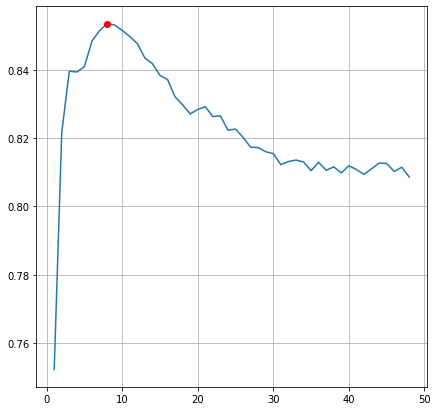

In [28]:
scores = list(map(lambda a: a[1], score_list))
fig = plt.figure(figsize=(7, 7))
plt.grid(b=True)
sns.lineplot(x=range(1, depth+1), y=scores)
plt.plot(scores.index(max(scores)) + 1, max(scores), "or")

In [29]:
print('The best algorithm: DecisionTreeClassifier(max_depth={}), its accuracy: {}'.format(scores.index(max(scores)) + 1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth=8), its accuracy: 0.853


The graph shows that default depth overfitted the algorithm. A proper max_depth that maximaize accuracy is around 9.

### 3.1.2 min_samples_leaf

In [30]:
# min_samples_leaf in already created DT
default_alg[0][0].get_params()['min_samples_leaf']

1

In [31]:
algorithms = []
for i in range(1, 202, 5):
    algorithms.append(DecisionTreeClassifier(min_samples_leaf=i))
score_list = algoritm_score_list()

all predictions finished


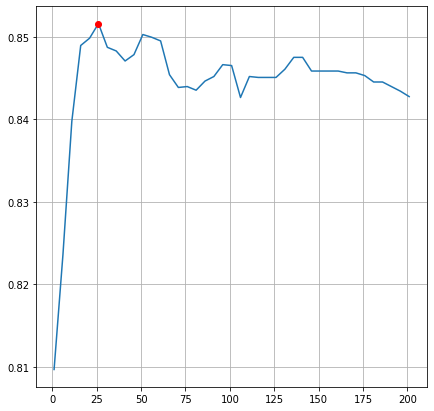

In [32]:
scores = list(map(lambda a: a[1], score_list))
fig = plt.figure(figsize=(7, 7))
plt.grid(b=True)
sns.lineplot(x=range(1, 202, 5), y=scores)
plt.plot(scores.index(max(scores))*5 + 1, max(scores), "or")

In [33]:
print('The best algorithm: DecisionTreeClassifier(min_samples_leaf={}), its accuracy: {}'.format(scores.index(max(scores))*5 + 1, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(min_samples_leaf=26), its accuracy: 0.852


The graph shows that default min_samples_leaf overfitted the algorithm. A proper min_samples_leaf that increases accuracy should be bigger than 25 and smaller than 170 (it really depends on train and test spliting).

### 3.1.3 max_depth and min_samples_leaf

In [34]:
algorithms = []
for i in range(4, 30, 3):
    for j in range(45, 86, 5):
         algorithms.append(DecisionTreeClassifier(max_depth=i, min_samples_leaf=j))
score_list = algoritm_score_list()   

all predictions finished


In [35]:
max_depth = list(map(lambda a: a[0].get_params()['max_depth'], score_list))
min_samples_leaf = list(map(lambda a: a[0].get_params()['min_samples_leaf'], score_list))
scores = list(map(lambda a: a[1], score_list))

df = pd.DataFrame(np.array([max_depth, min_samples_leaf, scores]).T, 
                  columns=['max_depth', 'min_s_l', 'scores'])

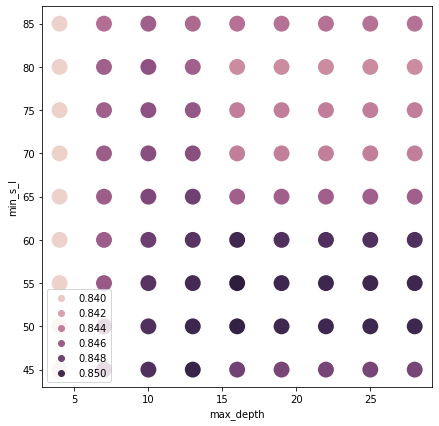

In [36]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=df['max_depth'], y=df['min_s_l'], hue=df['scores'], s=300)
plt.legend(loc='lower left')

In [37]:
best = scores.index(max(scores))
m_d = max_depth[best]
m_s_l = min_samples_leaf[best]
print('The best algorithm: DecisionTreeClassifier(max_depth={}, min_samples_leaf={}), its accuracy: {}'.format(m_d, m_s_l, round(max(scores), 3)))

The best algorithm: DecisionTreeClassifier(max_depth=16, min_samples_leaf=55), its accuracy: 0.851


### 3.1.4 criterion

In [38]:
algorithms = [DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy')]
score_list = algoritm_score_list()   
print('criterion: gini, score: {}.'.format(str(round(score_list[0][1], 3))))
print('criterion: entropy, score: {}.'.format(str(round(score_list[1][1], 3))))

all predictions finished
criterion: gini, score: 0.812.
criterion: entropy, score: 0.812.


My criterion comparison showed that there is no huge difference between gini and entropy in this particular dataset. Consequently, I use the default criterion: gini.

### 3.1.5 Algorithms comparison 

In [39]:
algorithms = [DecisionTreeClassifier(criterion='gini', max_depth=9), 
              DecisionTreeClassifier(criterion='gini', min_samples_leaf=66), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65)]
df_DT = pd.DataFrame(algoritm_score_list(), columns=['algorithm', 'accuracy', 'standardized'])
df_DT

all predictions finished


,algorithm,accuracy,standardized
0,DecisionTreeClassifier(max_depth=9),0.853,False
1,DecisionTreeClassifier(min_samples_leaf=66),0.845,False
2,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.846,False


As for accuracy there isn't a huge difference between these three DecisionTrees. All of them have accuracy similar to 0.85. However, for the final test of all algorithms I will use DecissionTree with max_depth and min_samples_leaf specified.

## 3.2 Tuning LogisticRegression
As for LogiticRegression I will try to fix penalty and C parameters.

In [40]:
algorithms = []
for p in ['l1', 'l2']:
    algorithms.append(LogisticRegression(solver='liblinear', penalty=p))
    
df_LR_penalty = pd.DataFrame(algoritm_score_list(standardized=True), columns=['algorithm', 'accuracy', 'standardized'])
df_LR_penalty

all predictions finished


,algorithm,accuracy,standardized
0,"LogisticRegression(penalty='l1', solver='libli...",0.847,True
1,LogisticRegression(solver='liblinear'),0.845,True


Scores in both LogisticRegressions are similar. While I have to choose one of them I decided to use 'l1'.

In [41]:
algorithms = []
for c in [100, 10, 1.0, 0.1, 0.01]:
    algorithms.append(LogisticRegression(solver='liblinear', penalty='l1', C=c))

df_LR = pd.DataFrame(algoritm_score_list(standardized=True), columns=['algorithm', 'accuracy', 'standardized'])
df_LR

all predictions finished


,algorithm,accuracy,standardized
0,"LogisticRegression(C=100, penalty='l1', solver...",0.847,True
1,"LogisticRegression(C=10, penalty='l1', solver=...",0.847,True
2,"LogisticRegression(penalty='l1', solver='libli...",0.847,True
3,"LogisticRegression(C=0.1, penalty='l1', solver...",0.842,True
4,"LogisticRegression(C=0.01, penalty='l1', solve...",0.814,True


The final LogisticRegression algorithm is LogisticRegression(C=10, penalty='l1', solver='liblinear').

## 3.3 Tuning KNeighborsClassifier
I will try to optimize two parameters in this algorithm: weights and n_neighbors.

In [42]:
algorithms = [KNeighborsClassifier(weights='uniform'), 
              KNeighborsClassifier(weights='distance')]
df_KN_weights = pd.DataFrame(algoritm_score_list(standardized=True), columns=['algorithm', 'accuracy', 'standardized'])
df_KN_weights

all predictions finished


,algorithm,accuracy,standardized
0,KNeighborsClassifier(),0.816,True
1,KNeighborsClassifier(weights='distance'),0.811,True


I will use default weights parameter.

In [43]:
algorithms = []
for i in range(1, 50, 5):
    algorithms.append(KNeighborsClassifier(n_neighbors=i))
    
df_KN_n_neighbors = pd.DataFrame(algoritm_score_list(standardized=True), columns=['algorithm', 'accuracy', 'standardized'])

all predictions finished


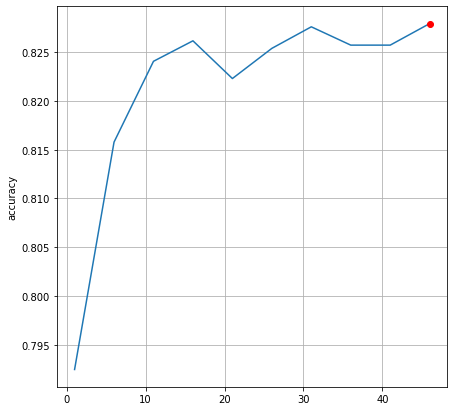

In [44]:
fig = plt.figure(figsize=(7, 7))
plt.grid(b=True)
sns.lineplot(x=range(1, 50, 5), y=df_KN_n_neighbors['accuracy'])
plt.plot(df_KN_n_neighbors[df_KN_n_neighbors['accuracy'] == max(df_KN_n_neighbors['accuracy'])].index.values[0]*5+1,
         max(df_KN_n_neighbors['accuracy']),
         "or")

It took so much time but I really wanted to see results. For n_neighbors parameter equal to about 46 there is the biggest accuracy.

# 4 Final comparison and summary

In [45]:
algorithms = [DecisionTreeClassifier(), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65),
              LogisticRegression(solver='liblinear'), 
              LogisticRegression(C=10, penalty='l1', solver='liblinear'),
              KNeighborsClassifier(), 
              KNeighborsClassifier(n_neighbors=46)]

final_list = algoritm_score_list()

all predictions finished


In [46]:
algorithms = [DecisionTreeClassifier(), 
              DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=65),
              LogisticRegression(solver='liblinear'), 
              LogisticRegression(C=10, penalty='l1', solver='liblinear'),
              KNeighborsClassifier(), 
              KNeighborsClassifier(n_neighbors=46)]
final_list = final_list + algoritm_score_list(standardized=True)

all predictions finished


In [47]:
final_df = pd.DataFrame(final_list, columns=['algorithm', 'accuracy', 'standardized'])
final_df.head(12).sort_values(by='accuracy', ascending=False)

,algorithm,accuracy,standardized
3,"LogisticRegression(C=10, penalty='l1', solver=...",0.847,False
9,"LogisticRegression(C=10, penalty='l1', solver=...",0.847,True
1,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.846,False
7,"DecisionTreeClassifier(max_depth=16, min_sampl...",0.846,True
8,LogisticRegression(solver='liblinear'),0.845,True
11,KNeighborsClassifier(n_neighbors=46),0.828,True
10,KNeighborsClassifier(),0.816,True
0,DecisionTreeClassifier(),0.812,False
6,DecisionTreeClassifier(),0.809,True
2,LogisticRegression(solver='liblinear'),0.792,False


DecisionTree and LogisticRegression with fixed parameters have the highest accuracy. Moreover, DecisionTree doesn't need standardized numeric data to work properly. As for DecisionTree, adding parameters increased accuracy by 3,5% in case of LogisticRegression this increase was much smaller. KNeighborsClassifier accuracy is smaller than the rest of algorithms. 